In [440]:
import numpy as np
import pandas as pd

In [441]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [442]:
import statsmodels

In [443]:
ad = pd.read_csv("https://github.com/CharlotteZepeda/DP-Mini-Project/raw/380cff8680d5152a2d7e076ef1abd7f49c45073c/adni.csv")

### Data Checking

In [444]:
ad.shape

(1851, 50)

In [445]:
#check number of datapoints in each category 
ad.groupby("DIAGNOSIS").size()

DIAGNOSIS
CN          617
Dementia    348
MCI         886
dtype: int64

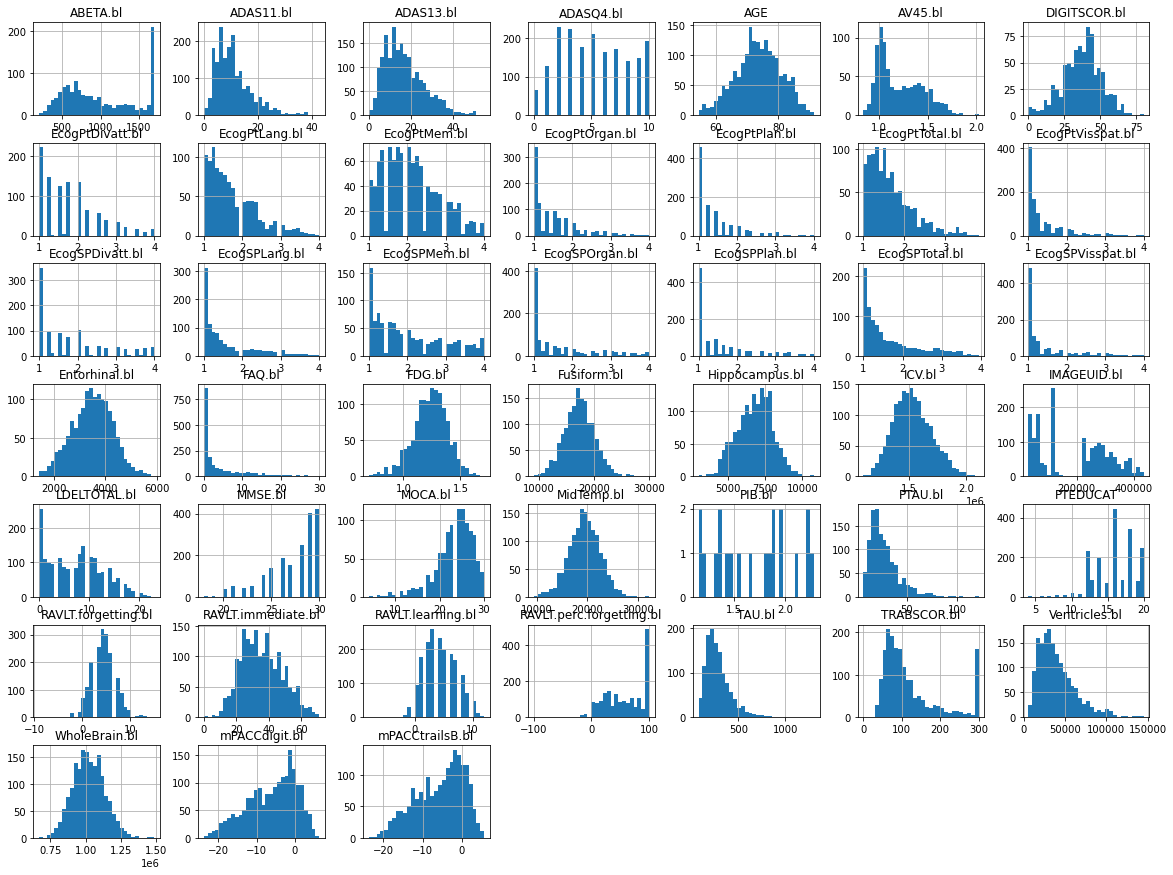

In [446]:
#check variable distributions
ad.hist(bins=30, figsize=(20,15))
plt.show()

The distributions of the data show that there are: <br> 1851 people with an uneven distribution of the outcome (CN:Dementia:MCI = 617:348:886). 


In [447]:
ad.describe()

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PIB.bl,AV45.bl
count,1851.000000,1851.000000,1846.000000,1836.000000,1850.000000,1851.000000,1843.000000,1843.000000,1843.000000,1837.000000,...,1013.000000,981.000000,1002.000000,1021.000000,1215.000000,1215.000000,1215.000000,1301.000000,20.000000,891.000000
mean,73.603944,15.947596,10.792156,16.808448,5.184324,27.278768,35.772653,4.277265,4.300054,57.382509,...,1.547038,1.637802,1.812542,1.677406,980.085021,287.027086,27.641152,1.233852,1.698375,1.211917
std,7.199413,2.828228,6.539005,9.433675,2.944607,2.665917,12.641034,2.779961,2.500496,34.578994,...,0.771411,0.848796,0.907289,0.719877,457.557491,132.813700,14.603251,0.154266,0.372302,0.227395
min,54.400000,4.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-8.000000,-9.000000,-100.000000,...,1.000000,1.000000,1.000000,1.000000,199.000000,79.000000,7.000000,0.697264,1.155000,0.838537
25%,69.000000,14.000000,6.000000,10.000000,3.000000,26.000000,26.000000,2.000000,3.000000,28.571429,...,1.000000,1.000000,1.000000,1.108108,596.150000,193.350000,17.350000,1.141442,1.361875,1.020809
50%,73.600000,16.000000,9.330000,15.000000,5.000000,28.000000,35.000000,4.000000,4.000000,57.142857,...,1.200000,1.200000,1.500000,1.384615,854.200000,257.800000,24.150000,1.245474,1.743750,1.136146
75%,78.700000,18.000000,14.000000,22.330000,8.000000,29.000000,45.000000,6.000000,6.000000,100.000000,...,1.800000,2.000000,2.250000,2.051282,1395.500000,349.700000,33.975000,1.336828,1.956250,1.390537
max,91.400000,20.000000,42.670000,54.670000,10.000000,30.000000,71.000000,12.000000,15.000000,100.000000,...,4.000000,4.000000,4.000000,3.948718,1701.000000,1301.000000,121.000000,1.707168,2.282500,2.025560


In [448]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DIAGNOSIS                 1851 non-null   object 
 1   AGE                       1851 non-null   float64
 2   PTGENDER                  1851 non-null   object 
 3   PTEDUCAT                  1851 non-null   int64  
 4   PTETHCAT                  1851 non-null   object 
 5   PTRACCAT                  1851 non-null   object 
 6   PTMARRY                   1851 non-null   object 
 7   ADAS11.bl                 1846 non-null   float64
 8   ADAS13.bl                 1836 non-null   float64
 9   ADASQ4.bl                 1850 non-null   float64
 10  MMSE.bl                   1851 non-null   int64  
 11  RAVLT.immediate.bl        1843 non-null   float64
 12  RAVLT.learning.bl         1843 non-null   float64
 13  RAVLT.forgetting.bl       1843 non-null   float64
 14  RAVLT.pe

In [449]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'DIAGNOSIS'. 
ad["Diagnosis_Ordinal"]= label_encoder.fit_transform(ad["DIAGNOSIS"])
ad["PTGENDER_Ordinal"]= label_encoder.fit_transform(ad["PTGENDER"])
ad["PTMARRY_Ordinal"]= label_encoder.fit_transform(ad["PTMARRY"])
print(ad.head())

ad[["Diagnosis_Ordinal", "DIAGNOSIS", "PTGENDER_Ordinal", "PTGENDER", "PTMARRY_Ordinal", "PTMARRY"]].sample(20)

  DIAGNOSIS   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  \
0        CN  74.3     Male        16  Not Hisp/Latino    White  Married   
1  Dementia  81.3     Male        18  Not Hisp/Latino    White  Married   
2       MCI  67.5     Male        10      Hisp/Latino    White  Married   
3        CN  73.7     Male        16  Not Hisp/Latino    White  Married   
4       MCI  80.4   Female        13  Not Hisp/Latino    White  Married   

   ADAS11.bl  ADAS13.bl  ADASQ4.bl  ...  EcogSPTotal.bl  ABETA.bl  TAU.bl  \
0      10.67      18.67        5.0  ...             NaN       NaN     NaN   
1      22.00      31.00        8.0  ...             NaN     741.5   239.7   
2      14.33      21.33        6.0  ...             NaN    1501.0   153.1   
3       8.67      14.67        4.0  ...             NaN     547.3   337.0   
4      18.67      25.67        7.0  ...             NaN       NaN     NaN   

   PTAU.bl    FDG.bl  PIB.bl  AV45.bl  Diagnosis_Ordinal  PTGENDER_Ordinal  \
0      N

,Diagnosis_Ordinal,DIAGNOSIS,PTGENDER_Ordinal,PTGENDER,PTMARRY_Ordinal,PTMARRY
1669,0,CN,0,Female,1,Married
1049,0,CN,0,Female,4,Widowed
1716,0,CN,1,Male,2,Never married
97,2,MCI,0,Female,1,Married
76,0,CN,1,Male,1,Married
1682,1,Dementia,1,Male,1,Married
630,1,Dementia,0,Female,1,Married
194,1,Dementia,0,Female,4,Widowed
1257,2,MCI,1,Male,1,Married
1532,2,MCI,1,Male,1,Married


In [450]:
import scipy as sp
import scipy.stats as stats
count = ad.count()

ad_stats = pd.DataFrame(count, columns = ["Non-NaN"])

min_vals = ad.min()
ad_stats['Min'] = min_vals

max_vals = ad.max()
ad_stats['Max'] = max_vals

mean_vals = ad.mean(skipna = True)
ad_stats['Mean'] = mean_vals

median_vals = ad.median(skipna=True)
ad_stats['Median'] = median_vals

ad_mode_sci = stats.mode(ad, nan_policy='omit')
ad_stats['Mode'] = ad_mode_sci[0][0]


ad_stats

,Non-NaN,Min,Max,Mean,Median,Mode
DIAGNOSIS,1851,CN,MCI,NaN,NaN,MCI
AGE,1851,54.4,91.4,7.360394e+01,7.360000e+01,71.4
PTGENDER,1851,Female,Male,NaN,NaN,Male
PTEDUCAT,1851,4,20,1.594760e+01,1.600000e+01,16
PTETHCAT,1851,Hisp/Latino,Unknown,NaN,NaN,Not Hisp/Latino
PTRACCAT,1851,Am Indian/Alaskan,White,NaN,NaN,White
PTMARRY,1851,Divorced,Widowed,NaN,NaN,Married
ADAS11.bl,1846,0,42.67,1.079216e+01,9.330000e+00,9
ADAS13.bl,1836,0,54.67,1.680845e+01,1.500000e+01,9
ADASQ4.bl,1850,0,10,5.184324e+00,5.000000e+00,2


In [451]:
# I wrote a function to drop variables with >40% NaN and uncommented the next cell because it was redundant

#Calculating how many variables have <40% NaN
def dropNaNCols(ad):
    for column in ad:
        nan_count = ad[column].isna().sum()
        if nan_count >= (len(ad)*0.4):
            ad = ad.drop(column, axis=1)
    return ad


In [452]:
ad_df = dropNaNCols(ad)

In [453]:
#replaced the 'Unknown' category with NAN and counted NANs across all the variables.

#ad_df=ad_df.replace('Unknown', np.nan)
#ad_df.isna().sum()

In [454]:
# Wrote a for-loop to replace the function I wrote earlier duh
# I think these tables are a lot clearer

# Performing chi2 tests
from scipy.stats import chi2_contingency

cols = ['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY']
for i in cols:
    ct = pd.crosstab(ad_df[i], ad_df['DIAGNOSIS'], margins=True)
    stat, pvalue, dof, expected = chi2_contingency(ct)
    print('\n', '\n', ct)
    print('Chi2 pvalue =', pvalue)


 
 DIAGNOSIS   CN  Dementia  MCI   All
PTGENDER                           
Female     334       157  362   853
Male       283       191  524   998
All        617       348  886  1851
Chi2 pvalue = 0.00022661757321130107

 
 DIAGNOSIS         CN  Dementia  MCI   All
PTETHCAT                                 
Hisp/Latino       21        11   29    61
Not Hisp/Latino  592       334  852  1778
Unknown            4         3    5    12
All              617       348  886  1851
Chi2 pvalue = 0.999990050847327

 
 DIAGNOSIS           CN  Dementia  MCI   All
PTRACCAT                                   
Am Indian/Alaskan    1         0    2     3
Asian               11         7   14    32
Black               35        14   30    79
Hawaiian/Other PI    0         0    2     2
More than one        8         4    7    19
Unknown              1         0    3     4
White              561       323  828  1712
All                617       348  886  1851
Chi2 pvalue = 0.9725529280070867

 
 DIAGNOSIS 

### Chi Squared Test Conclusions
Chi Squared Test Results indicate : <br><br>
(i) Significant association between Gender and Diagnosis Category **p value < .001** <br>
(ii) Non-Significant association between ethnicity and Diagnosis Category **p value > 0.05** <br>
(iii) Non-Significant association between Race and Diagnosis Category **p value > 0.05** <br>
(iv) Significant association between Marital Status and Diagnosis Category **p value < .001**

### ANOVA Tests On Numerical Variables 

Basic Assumption of ANOVA is that **each group is drawn from a normal population**, therefore data should be rescaled (cell 24 shows not all variables are normally distributed)

### Column Rescaling
1. Rescale all the columns <br>
2. Make a deep copy <br>
3. Drop categorical variables from the deep copy<br>
4. Compute individual ANOVAs for each variable 

In [455]:
# Rescale the columns of the dataframe
# for each value v in a distribution of values V:
#    v = (v-mean(V)) / std(V)

def rescale(ad_df):
    for col_name in ad_df.loc[:,:]:
        values = []
        mean_V = ad_df.loc[:,col_name].mean(skipna = True)
        std_V = ad_df.loc[:,col_name].std(skipna = True)
        for v in ad_df.loc[:, col_name]:
            v = (v - mean_V) / std_V
            values.append(v)
        ad_df[col_name] = values
    return ad_df

In [456]:
# Make a deep copy of the data, holding the rescaled values:
cad_df = ad_df.copy()

cad_dfdropped = cad_df.drop(
    ['DIAGNOSIS','PTGENDER','PTETHCAT','PTRACCAT','PTMARRY', 'Diagnosis_Ordinal', 
     'PTMARRY_Ordinal', 'PTGENDER_Ordinal'], axis=1)

Added non-rescaled columns to the rescaled dataset in one go.

In [457]:
# Adding the categorical columns back

cad_df= rescale(cad_dfdropped)
non_rescaled_cat_cols = [ad_df['PTETHCAT'],ad_df['PTRACCAT'], 
                         ad_df['Diagnosis_Ordinal'], ad_df['PTMARRY_Ordinal'], ad_df['PTGENDER_Ordinal']]
cad_df=cad_df.join(non_rescaled_cat_cols)

In [458]:
#Loop for computing ANOVAS for numerical variables
from scipy.stats import f_oneway
cols = ['AGE','PTEDUCAT','ADAS11.bl','ADAS13.bl','ADASQ4.bl','MMSE.bl','RAVLT.immediate.bl','RAVLT.learning.bl','RAVLT.perc.forgetting.bl','LDELTOTAL.bl','TRABSCOR.bl','FAQ.bl','mPACCdigit.bl','mPACCtrailsB.bl','IMAGEUID.bl','Ventricles.bl','Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','Fusiform.bl','MidTemp.bl','ICV.bl','ABETA.bl','TAU.bl','PTAU.bl','FDG.bl']
for i in cols:
    a1=cad_df[i][cad_df.Diagnosis_Ordinal==0]
    a2=cad_df[i][cad_df.Diagnosis_Ordinal==1]
    a3=cad_df[i][cad_df.Diagnosis_Ordinal==2]

    a1 = a1[np.logical_not(np.isnan(a1))]
    a2 = a2[np.logical_not(np.isnan(a2))]
    a3 = a3[np.logical_not(np.isnan(a3))]
    print(i) 
    print('Anova Test Result = ', f_oneway(a1, a2, a3))
    print('\n')

AGE
Anova Test Result =  F_onewayResult(statistic=8.83665219059515, pvalue=0.00015153936740062868)


PTEDUCAT
Anova Test Result =  F_onewayResult(statistic=23.121485599146336, pvalue=1.2079389667889303e-10)


ADAS11.bl
Anova Test Result =  F_onewayResult(statistic=904.2155333509479, pvalue=2.354203440239909e-274)


ADAS13.bl
Anova Test Result =  F_onewayResult(statistic=1105.6212640709487, pvalue=1.052235277e-315)


ADASQ4.bl
Anova Test Result =  F_onewayResult(statistic=851.1805776742857, pvalue=1.0434595266198145e-262)


MMSE.bl
Anova Test Result =  F_onewayResult(statistic=1435.8484994640044, pvalue=0.0)


RAVLT.immediate.bl
Anova Test Result =  F_onewayResult(statistic=590.3242404968256, pvalue=8.714124602234297e-199)


RAVLT.learning.bl
Anova Test Result =  F_onewayResult(statistic=329.85656732971677, pvalue=3.744887242592438e-123)


RAVLT.perc.forgetting.bl
Anova Test Result =  F_onewayResult(statistic=388.28189923981097, pvalue=2.465037022140986e-141)


LDELTOTAL.bl
Anova Test R

## ANOVA Test Conclusions


### Data Stratification 

In [459]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(ad_df, test_size=0.25, random_state=12, stratify=ad_df['Diagnosis_Ordinal']) 

# separate the 'DIAGNOSIS' column from training/testing data
train_X = train[train.columns[np.r_[1,3,7:len(ad_df.keys())-3, -2, -1]]]
test_X = test[test.columns[np.r_[1,3,7:len(ad_df.keys())-3,-2, -1]]]
train_Y = train['Diagnosis_Ordinal']
test_Y = test['Diagnosis_Ordinal']

### Data Imputation


In [460]:
# remove categorical variables for data imputation

train_X=pd.DataFrame(train_X)
train_X

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1778,58.7,18,9.67,11.67,2.0,29,53.0,5.0,2.0,16.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1573,62.9,12,20.00,30.00,9.0,21,23.0,1.0,5.0,100.000000,...,2176.0,11245.0,13801.0,1.420785e+06,587.9,363.4,36.63,0.924564,0,0
1578,79.6,16,28.00,40.00,10.0,23,16.0,-1.0,3.0,100.000000,...,2646.0,19798.0,19214.0,1.778052e+06,277.5,666.2,68.07,0.827834,1,1
189,76.9,16,11.33,18.33,7.0,27,19.0,1.0,4.0,100.000000,...,NaN,NaN,NaN,1.607161e+06,1701.0,257.6,24.04,1.270380,1,1
863,62.5,18,6.00,9.00,3.0,30,44.0,7.0,9.0,75.000000,...,3542.0,18432.0,23420.0,1.587815e+06,413.9,328.3,28.71,1.343290,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,63.4,19,12.00,17.00,5.0,29,36.0,5.0,6.0,54.545455,...,4178.0,14109.0,15867.0,1.280794e+06,487.9,246.2,24.13,1.169680,0,1
187,75.3,14,10.33,19.33,8.0,24,42.0,2.0,6.0,66.666667,...,2183.0,12290.0,14612.0,1.341721e+06,NaN,NaN,NaN,NaN,0,1
611,85.0,15,5.00,11.00,5.0,28,54.0,10.0,1.0,7.142857,...,2137.0,18125.0,17753.0,1.388421e+06,NaN,NaN,NaN,1.276030,0,4
1816,70.4,16,8.33,12.33,4.0,30,37.0,6.0,8.0,72.727273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [461]:
from sklearn.impute import SimpleImputer
train_X_numeric = train_X.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_numeric = test_X.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_numeric)

# Here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)

# Performing the imputation on trainng set
train_X_numeric_tr=imputer.transform(train_X_numeric)

# and imputation on test set
test_X_numeric_tr=imputer.transform(test_X_numeric)
type(train_X_numeric)
train_X_numeric_tr=pd.DataFrame(train_X_numeric_tr, columns=train_X_numeric.columns, index = train_X_numeric.index)
test_X_numeric_tr=pd.DataFrame(test_X_numeric_tr, columns=test_X_numeric.columns, index = test_X_numeric.index)

means per columns for imputation [ 7.36009366e+01  1.59466859e+01  1.08010405e+01  1.68141715e+01
  5.18745494e+00  2.73134006e+01  3.58364689e+01  4.29088278e+00
  4.23227207e+00  5.66436571e+01  7.33718412e+00  1.19460282e+02
  4.07814761e+00 -5.91310674e+00 -5.62372335e+00  1.93348397e+05
  4.03832810e+04  6.78884636e+03  1.02081930e+06  3.48764168e+03
  1.73090850e+04  1.94826353e+04  1.53119150e+06  9.78462376e+02
  2.85107514e+02  2.74013971e+01  1.23199200e+00]


In [462]:
# Joining categocial variables with the imputed dataframe.

train_X_cat_cols = [train_X['PTGENDER_Ordinal'],train_X['PTMARRY_Ordinal']]
test_X_cat_cols = [test_X['PTGENDER_Ordinal'],test_X['PTMARRY_Ordinal']]
train_X=train_X_numeric_tr.join(train_X_cat_cols)
test_X=test_X_numeric_tr.join(test_X_cat_cols)

In [484]:
pd.DataFrame(test_X)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1803,61.1,12.0,7.33,8.33,1.0,29.0,55.0,9.0,7.0,46.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,1,2
1431,78.7,16.0,10.00,18.00,7.0,20.0,37.0,3.0,6.0,75.000000,...,2569.000000,14939.000000,14738.000000,1.401917e+06,978.462376,285.107514,27.401397,0.995194,0,0
271,86.6,13.0,21.67,34.67,10.0,21.0,20.0,1.0,4.0,100.000000,...,2382.000000,13644.000000,15568.000000,1.480431e+06,725.200000,444.800000,44.280000,1.296018,0,1
263,81.8,13.0,8.00,13.00,4.0,29.0,39.0,5.0,3.0,30.000000,...,3633.000000,13901.000000,16602.000000,1.448741e+06,1701.000000,368.600000,31.710000,1.292958,0,1
917,74.8,15.0,6.00,9.00,2.0,29.0,48.0,7.0,6.0,54.545455,...,3487.641682,17309.085009,19482.635283,1.390448e+06,982.600000,142.000000,11.780000,1.199310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,74.3,18.0,5.33,8.33,2.0,27.0,29.0,2.0,5.0,71.428571,...,3277.000000,16735.000000,21214.000000,1.601605e+06,1308.000000,213.700000,18.620000,1.189966,1,1
183,71.5,16.0,6.67,11.67,4.0,28.0,36.0,6.0,8.0,72.727273,...,4310.000000,16398.000000,20063.000000,1.644781e+06,978.462376,285.107514,27.401397,1.290036,1,1
1596,83.0,18.0,7.00,9.00,2.0,25.0,39.0,9.0,6.0,50.000000,...,3309.000000,17564.000000,18185.000000,1.257899e+06,1701.000000,193.900000,16.840000,1.348888,0,4
1160,66.7,16.0,3.00,5.00,2.0,29.0,45.0,8.0,5.0,41.666667,...,5097.000000,26540.000000,19623.000000,1.611425e+06,1701.000000,179.600000,15.400000,1.336566,0,0


In [487]:
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.923692,-13.415913,-1.912853,0.440834,2.184612,5.188995,3.434116,2.453469,7.398636,-0.940277,2.481085,0.348096,2.178978,0.142069,-5.950659,-0.874811,0.521951,-1.372090,0.771315,-0.662742
1,4.895499,7.526509,1.043980,-0.896867,-1.643578,0.666700,4.025287,-0.375642,6.073333,-0.478789,0.760994,2.850982,1.835766,-1.036812,4.806879,0.893067,-1.907027,-2.919583,0.996553,-0.250624
2,-2.782442,6.257461,-0.077028,-4.951237,-0.610708,-1.090443,-3.187345,8.141970,-12.950454,-0.550231,1.842625,-6.955840,3.750457,1.996471,3.966932,2.837618,0.279896,-1.916924,-1.670177,-6.103241
3,-2.207274,-1.435671,-1.383125,-0.739959,-1.415317,-0.133708,-2.680814,4.916742,-7.503655,2.098927,0.731310,0.376525,2.299455,2.185165,0.896560,-1.258853,1.020019,-2.083430,-0.793345,-4.236937
4,-0.044496,-10.693911,0.146758,4.198369,1.792062,3.270400,-0.277819,-0.058419,2.808280,-1.833351,-2.503366,1.317641,4.653099,0.383835,-1.396822,-3.346147,0.292776,0.532935,-0.709225,1.778277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.811965,4.263626,-0.534576,-5.274106,0.569767,-0.300437,6.332000,-2.573062,0.663288,-1.154263,-3.200812,-0.851557,0.049589,-0.572970,-1.034476,3.095329,-3.006921,-0.347739,-0.369794,6.379225
996,0.688110,1.846603,0.201482,-4.003064,-2.476604,1.265810,5.775518,0.502495,-2.948699,1.021831,1.055261,2.051082,1.374001,3.215230,-0.940263,1.877763,-1.106616,-4.159924,-0.638861,3.228385
997,-2.307713,-1.731990,-0.539809,1.464385,0.528460,1.248885,-0.526824,-1.494330,2.181234,1.426799,1.124834,-1.429571,-1.361403,-0.484102,-0.294229,0.016382,-0.025795,2.958621,-1.287771,1.013353
998,-1.180124,-3.383115,0.412684,0.910881,-1.770469,-0.079635,2.192544,4.419877,-1.729076,-3.038854,-1.568877,3.827858,0.447463,1.506375,1.509562,-1.043839,-0.217570,-1.805640,1.744707,-2.056563


# Building and evaluation predictive models on training set, and testing on test set

### We'll use cross validation to look also for good values for the model's hyperparameters.

In [463]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt_a = dt.fit(train_X, train_Y)
scores=cross_val_score(dt_a, train_X, train_Y, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.84172662 0.82733813 0.84892086 0.83453237 0.87769784 0.84892086
 0.87769784 0.79856115 0.79710145 0.8115942 ]
and their mean 0.8364091335627151


In [464]:
featureImportanceA = []

for name, importance in zip(train_X.keys(), dt.feature_importances_):
    featureImportanceA.append([name,importance])
   
featureImportanceA = pd.DataFrame(featureImportanceA, columns=['Name', 'Importance'])
featureImportanceA

,Name,Importance
0,AGE,0.022194
1,PTEDUCAT,0.007370
2,ADAS11.bl,0.000455
3,ADAS13.bl,0.021845
4,ADASQ4.bl,0.003610
5,MMSE.bl,0.027233
6,RAVLT.immediate.bl,0.009155
7,RAVLT.learning.bl,0.007949
8,RAVLT.forgetting.bl,0.005842
9,RAVLT.perc.forgetting.bl,0.007101


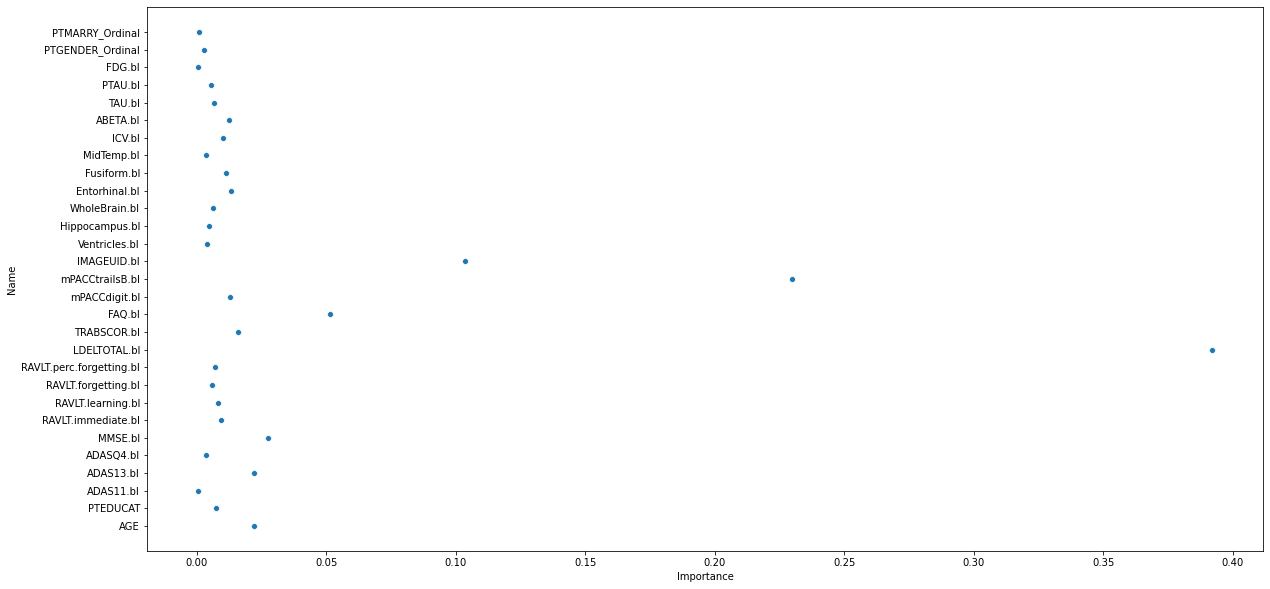

In [465]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Importance", y="Name", data=featureImportanceA, ax=ax);

In [466]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.89208633 0.89208633 0.87769784 0.87769784 0.92086331 0.87769784
 0.88489209 0.86330935 0.89130435 0.80434783]
and their mean 0.8781983109164843


In [467]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 5}
best estimator DecisionTreeClassifier(max_depth=5)


In [468]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8198571577520593 {'max_depth': 2}
0.8198571577520593 {'max_depth': 3}
0.8573297883432385 {'max_depth': 4}
0.8811177145240329 {'max_depth': 5}
0.8767594619956209 {'max_depth': 6}
0.870284641851736 {'max_depth': 7}
0.860186633302054 {'max_depth': 8}
0.8501199040767385 {'max_depth': 9}
0.8464915024502137 {'max_depth': 10}
0.8393181107288082 {'max_depth': 11}
0.8458033573141487 {'max_depth': 12}


In [469]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X, train_Y)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X, train_Y, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.8782919254658385
0.8724637681159418
0.8616770186335403


In [470]:
#Random Forest classifier

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [4, 5, 6, 7, 8]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X, train_Y)
    results = cross_val_score(random_forest, train_X, train_Y, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 4 estimators:
0.8674430641821946
Results for 5 estimators:
0.8724637681159418
Results for 6 estimators:
0.87175983436853
Results for 7 estimators:
0.8746480331262939
Results for 8 estimators:
0.875351966873706


In [471]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [472]:
# Estimating the Out-Of-Bag score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(train_X, train_Y)
bag_clf.oob_score_

0.8739193083573487

>1 0.838 (0.035)
>2 0.872 (0.027)
>3 0.879 (0.025)
>4 0.892 (0.030)
>5 0.917 (0.028)
>6 0.927 (0.021)
>7 0.926 (0.026)
>8 0.938 (0.026)
>9 0.933 (0.025)
>10 0.931 (0.029)


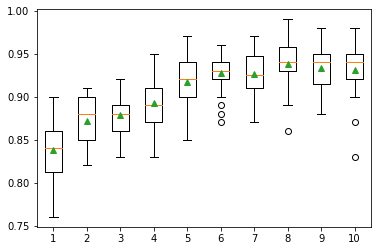

In [473]:
#explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    train_X, train_Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=12)
    return train_X, train_Y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models
 
# evaluate a given model using cross-validation
def evaluate_tree_depth(model, train_X, train_Y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_X, train_Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
train_X, train_Y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, train_X, train_Y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.100 0.806 (0.036)
>0.200 0.829 (0.034)
>0.300 0.837 (0.031)
>0.400 0.837 (0.033)
>0.500 0.838 (0.029)
>0.600 0.844 (0.030)
>0.700 0.834 (0.033)
>0.800 0.840 (0.033)
>0.900 0.840 (0.032)
>1.000 0.838 (0.035)
>1.100 0.837 (0.029)
>1.200 0.833 (0.027)
>1.300 0.830 (0.027)
>1.400 0.825 (0.031)
>1.500 0.820 (0.029)
>1.600 0.815 (0.043)
>1.700 0.802 (0.047)
>1.800 0.793 (0.038)
>1.900 0.761 (0.036)
>2.000 0.295 (0.040)


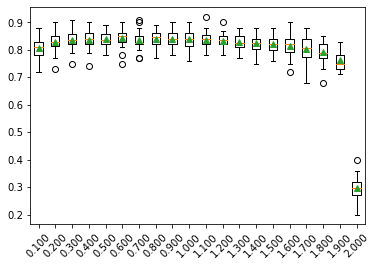

In [474]:
# explore adaboost ensemble learning rate effect on performance

# get the dataset
def get_dataset():
    train_X, train_Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=12)
    return train_X, train_Y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_learning_rate(model, train_X, train_Y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_X, train_Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
train_X, train_Y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_learning_rate(model, train_X, train_Y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>10 0.810 (0.035)
>50 0.838 (0.035)
>100 0.837 (0.032)
>500 0.838 (0.033)
>1000 0.830 (0.029)


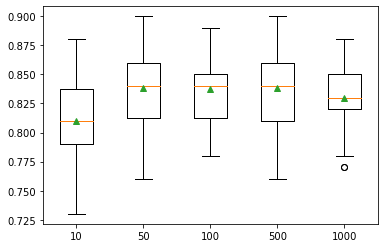

In [475]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    train_X, train_Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=12)
    return train_X, train_Y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_number_of_trees(model, train_X, train_Y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_X, train_Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
train_X, train_Y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_number_of_trees(model, train_X, train_Y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [482]:
test_X

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1803,61.1,12.0,7.33,8.33,1.0,29.0,55.0,9.0,7.0,46.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,1,2
1431,78.7,16.0,10.00,18.00,7.0,20.0,37.0,3.0,6.0,75.000000,...,2569.000000,14939.000000,14738.000000,1.401917e+06,978.462376,285.107514,27.401397,0.995194,0,0
271,86.6,13.0,21.67,34.67,10.0,21.0,20.0,1.0,4.0,100.000000,...,2382.000000,13644.000000,15568.000000,1.480431e+06,725.200000,444.800000,44.280000,1.296018,0,1
263,81.8,13.0,8.00,13.00,4.0,29.0,39.0,5.0,3.0,30.000000,...,3633.000000,13901.000000,16602.000000,1.448741e+06,1701.000000,368.600000,31.710000,1.292958,0,1
917,74.8,15.0,6.00,9.00,2.0,29.0,48.0,7.0,6.0,54.545455,...,3487.641682,17309.085009,19482.635283,1.390448e+06,982.600000,142.000000,11.780000,1.199310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,74.3,18.0,5.33,8.33,2.0,27.0,29.0,2.0,5.0,71.428571,...,3277.000000,16735.000000,21214.000000,1.601605e+06,1308.000000,213.700000,18.620000,1.189966,1,1
183,71.5,16.0,6.67,11.67,4.0,28.0,36.0,6.0,8.0,72.727273,...,4310.000000,16398.000000,20063.000000,1.644781e+06,978.462376,285.107514,27.401397,1.290036,1,1
1596,83.0,18.0,7.00,9.00,2.0,25.0,39.0,9.0,6.0,50.000000,...,3309.000000,17564.000000,18185.000000,1.257899e+06,1701.000000,193.900000,16.840000,1.348888,0,4
1160,66.7,16.0,3.00,5.00,2.0,29.0,45.0,8.0,5.0,41.666667,...,5097.000000,26540.000000,19623.000000,1.611425e+06,1701.000000,179.600000,15.400000,1.336566,0,0


In [488]:
# The AdaBoost Model

#k_folds = KFold(n_splits=10, random_state=12, shuffle=True)
#ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=50, algorithm="SAMME", learning_rate=0.8)
#ada_boost.fit(train_X, train_Y)

#pred_Y=ada_boost.predict(test_X)

#results = cross_val_score(ada_boost, train_X, train_Y, cv=k_folds)
#print("Results for {} estimators:".format(50))
#print(results.mean())

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 29 

In [477]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#best_dt=grid_search.best_estimator_


print('confusion matrix \n', confusion_matrix(test_Y, pred_Y))
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y, average='macro'))
print('\n recall', recall_score(test_Y, pred_Y, average='macro'))
print('\n f1', f1_score(test_Y, pred_Y, average='macro'))

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 29 

  # (B) CN vs Dementia

In [374]:
# Dropping the MCI rows

index_names_b = ad[ ad['DIAGNOSIS'] == 'MCI' ].index 
  
# drop these row indexes 
# from dataFrame 
adNoMCI = ad.drop(index_names_b) 

# Checking the new data frame
adNoMCI.groupby("DIAGNOSIS").size()

DIAGNOSIS
CN          617
Dementia    348
dtype: int64

In [375]:
adNoMCI=adNoMCI.drop(["DIAGNOSIS", "PTGENDER", "PTMARRY", "PTRACCAT", "PTRACCAT", "PTETHCAT"], axis=1)
adNoMCI = dropNaNCols(adNoMCI)
adNoMCI

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal
0,74.3,16,10.67,18.67,5.0,28,44.0,4.0,6.0,54.545455,...,16559.0,27936.0,1.984657e+06,NaN,NaN,NaN,1.369264,0,1,1
1,81.3,18,22.00,31.00,8.0,20,22.0,1.0,4.0,100.000000,...,15506.0,18422.0,1.920691e+06,741.5,239.7,22.83,1.090790,1,1,1
3,73.7,16,8.67,14.67,4.0,29,37.0,4.0,4.0,44.444444,...,24788.0,21614.0,1.640766e+06,547.3,337.0,33.43,1.297990,0,1,1
5,75.4,10,27.33,40.33,10.0,20,17.0,2.0,3.0,75.000000,...,12063.0,15374.0,1.353519e+06,NaN,NaN,NaN,NaN,1,1,1
6,84.5,18,5.00,7.00,2.0,28,51.0,7.0,3.0,25.000000,...,14043.0,20076.0,1.396068e+06,1701.0,440.2,37.51,1.276278,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,62.0,20,13.67,19.67,4.0,28,53.0,9.0,1.0,7.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1846,71.4,14,12.00,15.00,2.0,29,38.0,4.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
1847,65.8,13,6.00,8.00,1.0,27,65.0,7.0,15.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1849,72.6,19,6.67,8.67,0.0,30,57.0,8.0,4.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1


In [376]:
# Stratification 

from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(adNoMCI, test_size=0.25, random_state=12, stratify=adNoMCI['Diagnosis_Ordinal']) 

# separate the 'Diagnosis_Ordinal' column from training/testing data
train_X_b = train[train.columns[np.r_[0:len(adNoMCI.keys())-3, -2, -1]]]
test_X_b = test[test.columns[np.r_[0:len(adNoMCI.keys())-3,-2, -1]]]
train_Y_b = train['Diagnosis_Ordinal']
test_Y_b = test['Diagnosis_Ordinal']

In [377]:
train_X_b

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1537,69.3,12,6.00,7.00,1.0,28,48.0,6.0,4.0,30.769231,...,3520.0,17187.0,19807.0,1.278473e+06,1701.0,215.5,17.18,1.357068,0,1
1647,65.1,20,7.00,16.00,7.0,29,36.0,3.0,2.0,25.000000,...,3508.0,15214.0,22959.0,1.370208e+06,NaN,NaN,NaN,1.054252,0,2
770,79.5,13,17.33,29.33,10.0,25,23.0,3.0,5.0,100.000000,...,NaN,NaN,NaN,1.663636e+06,NaN,NaN,NaN,1.205728,0,1
162,65.9,16,22.00,34.00,9.0,26,22.0,4.0,5.0,83.333333,...,3531.0,19294.0,17448.0,1.847418e+06,642.9,416.9,40.28,0.977062,1,1
238,76.3,16,3.33,4.33,1.0,29,52.0,6.0,5.0,41.666667,...,4133.0,20208.0,20341.0,1.599489e+06,1006.0,107.3,10.57,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,64.2,15,8.67,15.67,7.0,24,24.0,2.0,6.0,100.000000,...,NaN,NaN,NaN,1.694433e+06,651.2,459.5,53.53,NaN,1,1
1780,67.9,12,10.67,15.67,4.0,29,29.0,5.0,3.0,37.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1490,79.6,13,19.00,29.00,8.0,26,25.0,3.0,4.0,66.666667,...,3178.0,14590.0,15354.0,1.379459e+06,532.9,379.1,37.91,0.982504,0,1
1795,65.4,18,8.67,12.67,3.0,30,47.0,10.0,10.0,71.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [378]:
#data_imputation 
from sklearn.impute import SimpleImputer
train_X_b_numeric = train_X_b.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_b_numeric = test_X_b.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_b_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on trainng set
train_X_b_numerictr =imputer.transform(train_X_b_numeric)

# and imputation on test set
test_X_b_numerictr=imputer.transform(test_X_b_numeric)

train_X_b_numerictr=pd.DataFrame(train_X_b_numerictr, columns=train_X_b_numeric.columns, index = train_X_b_numeric.index)
test_X_b_numerictr=pd.DataFrame(test_X_b_numerictr, columns=test_X_b_numeric.columns, index = test_X_b_numeric.index)


means per columns for imputation [ 7.38665284e+01  1.60373444e+01  1.12870139e+01  1.70619860e+01
  4.90443213e+00  2.70110650e+01  3.72158774e+01  4.47910864e+00
  3.93732591e+00  5.36808943e+01  8.86685160e+00  1.19674385e+02
  4.86546463e+00 -5.53784093e+00 -5.29359906e+00  2.04623481e+05
  3.95865894e+04  6.82516904e+03  1.01214905e+06  3.47642173e+03
  1.71190055e+04  1.93223444e+04  1.51961746e+06  1.00348307e+03
  2.83590067e+02  2.70269042e+01  1.21954845e+00]


In [379]:
# readding categorical variables with the imputed dataframe.

train_Xb_cat_cols = [train_X_b['PTGENDER_Ordinal'],train_X_b['PTMARRY_Ordinal']]
test_Xb_cat_cols = [test_X_b['PTGENDER_Ordinal'],test_X_b['PTMARRY_Ordinal']]
train_X_b=train_X_b_numerictr.join(train_Xb_cat_cols)
test_X_b=test_X_b_numerictr.join(test_Xb_cat_cols)

## Building a Model 

In [380]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt.fit(train_X_b, train_Y_b)
scores=cross_val_score(dt, train_X_b, train_Y_b, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.98630137 1.         0.98630137 0.98611111 1.         0.98611111
 0.98611111 1.         1.         0.98611111]
and their mean 0.9917047184170471


In [381]:
featureImportance = []

for name, importance in zip(adNoMCI.keys(), dt.feature_importances_):
    featureImportance.append([name,importance])
   
featureImportance = pd.DataFrame(featureImportance, columns=['Name', 'Importance'])
featureImportance

,Name,Importance
0,AGE,0.000000
1,PTEDUCAT,0.000000
2,ADAS11.bl,0.000000
3,ADAS13.bl,0.005973
4,ADASQ4.bl,0.000000
5,MMSE.bl,0.003997
6,RAVLT.immediate.bl,0.000000
7,RAVLT.learning.bl,0.000000
8,RAVLT.forgetting.bl,0.000000
9,RAVLT.perc.forgetting.bl,0.000000


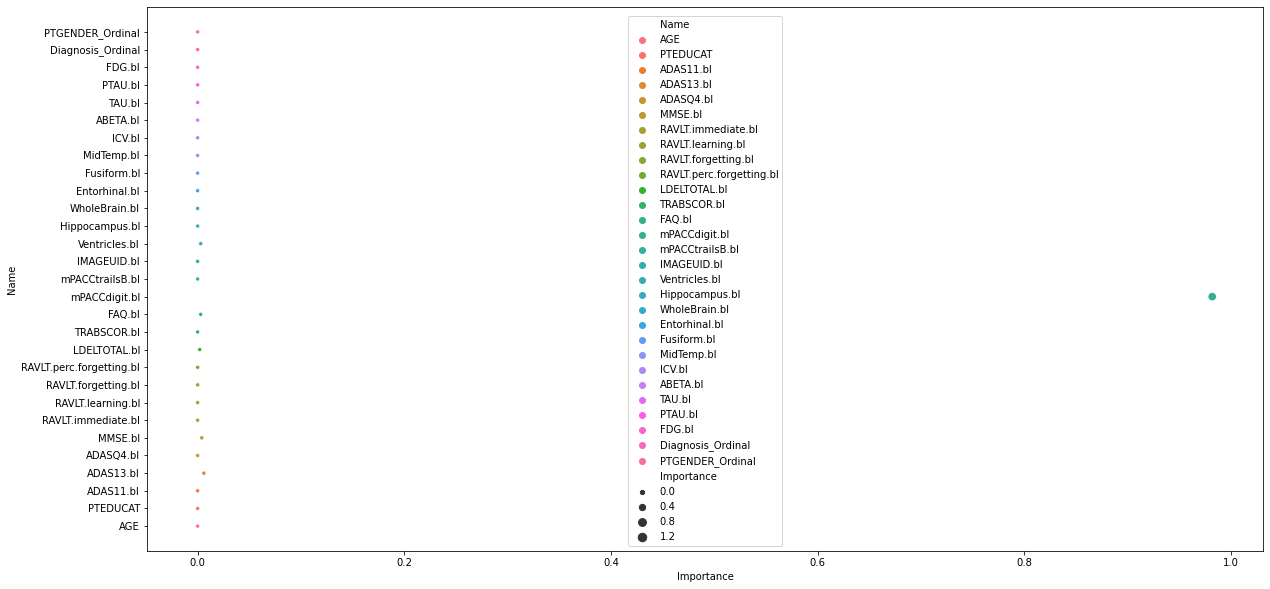

In [382]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Importance", y="Name", hue="Name", size="Importance" ,data=featureImportance, ax=ax);

In [383]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores=cross_val_score(dt, train_X_b, train_Y_b, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.98630137 1.         0.98630137 0.98611111 1.         0.98611111
 0.98611111 1.         1.         0.98611111]
and their mean 0.9917047184170471


In [384]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search_b = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search_b.fit(train_X_b, train_Y_b)
print('best parameter values', grid_search_b.best_params_)
print('best estimator', grid_search_b.best_estimator_)

best parameter values {'max_depth': 5}
best estimator DecisionTreeClassifier(max_depth=5)


In [385]:
cvres = grid_search_b.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.9889269406392694 {'max_depth': 2}
0.9889459665144595 {'max_depth': 3}
0.9889269406392694 {'max_depth': 4}
0.9903348554033485 {'max_depth': 5}
0.987576103500761 {'max_depth': 6}
0.9861872146118721 {'max_depth': 7}
0.9889459665144595 {'max_depth': 8}
0.9903158295281582 {'max_depth': 9}
0.98896499238965 {'max_depth': 10}
0.9903158295281582 {'max_depth': 11}
0.9903158295281582 {'max_depth': 12}


In [386]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X_b, train_Y_b)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X_b, train_Y_b, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)


0.9944444444444445
0.9958333333333333
0.9972222222222221


In [387]:
#Random Forest classifier and feature importance. 
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [2, 3, 4, 5]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X_b, train_Y_b)
    results = cross_val_score(random_forest, train_X_b, train_Y_b, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 2 estimators:
0.9972222222222221
Results for 3 estimators:
0.9958333333333333
Results for 4 estimators:
0.9958333333333333
Results for 5 estimators:
0.9958333333333333


In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X_b, train_Y_b)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [388]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(train_X_b, train_Y_b)
>>> bag_clf.oob_score_


0.9930843706777317

In [389]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {"base_estimator__criterion" : ["gini", "entropy"],
  'n_estimators': [10, 20, 50, 100],
  'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
 ]

grid_search_b = GridSearchCV(ada_boost, param_grid, cv=5,
 scoring='accuracy',
return_train_score=True)
grid_search_b.fit(train_X_b, train_Y_b)
grid_search_b.best_params_

{'base_estimator__criterion': 'gini', 'learning_rate': 0.1, 'n_estimators': 10}

In [65]:
# AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [10, 20, 50, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=i, algorithm="SAMME", learning_rate=0.1)
    results = cross_val_score(ada_boost, train_X_b, train_Y_b, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.9888888888888889
Results for 20 estimators:
0.9902777777777778
Results for 50 estimators:
0.9875
Results for 100 estimators:
0.9888888888888889


In [390]:
# now we evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

best_abc1=grid_search_b.best_estimator_
pred_Y_b=best_abc1.predict(test_X_b)

acc_B = accuracy_score(test_Y_b, pred_Y_b)
print('confusion matrix \n', confusion_matrix(test_Y_b, pred_Y_b))
print('\n accuracy', acc_B)
print('\n precision', precision_score(test_Y_b, pred_Y_b))
print('\n recall', recall_score(test_Y_b, pred_Y_b))
print('\n f1', f1_score(test_Y_b, pred_Y_b))

confusion matrix 
 [[155   0]
 [  0  87]]

 accuracy 1.0

 precision 1.0

 recall 1.0

 f1 1.0


In [ ]:
#explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

train_X_b, train_Y_b = get_dataset()
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_tree_depth(model, train_X_b, train_Y_b)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.100 0.806 (0.036)
>0.200 0.829 (0.034)
>0.300 0.837 (0.031)
>0.400 0.837 (0.033)
>0.500 0.838 (0.029)
>0.600 0.844 (0.030)
>0.700 0.834 (0.033)
>0.800 0.840 (0.033)
>0.900 0.840 (0.032)
>1.000 0.838 (0.035)


>0.100 0.806 (0.036)
>0.200 0.829 (0.034)
>0.300 0.837 (0.031)
>0.400 0.837 (0.033)
>0.500 0.838 (0.029)
>0.600 0.844 (0.030)
>0.700 0.834 (0.033)
>0.800 0.840 (0.033)
>0.900 0.840 (0.032)
>1.000 0.838 (0.035)
>1.100 0.837 (0.029)
>1.200 0.833 (0.027)
>1.300 0.830 (0.027)
>1.400 0.825 (0.031)
>1.500 0.820 (0.029)
>1.600 0.815 (0.043)
>1.700 0.802 (0.047)
>1.800 0.793 (0.038)
>1.900 0.761 (0.036)
>2.000 0.295 (0.040)


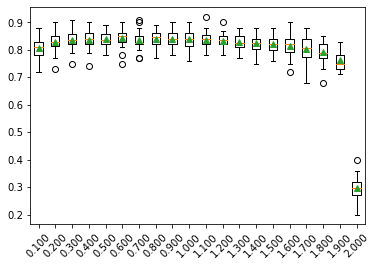

In [372]:
def get_dataset():
    train_X_b, train_Y_b = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=12)
    return train_X_b, train_Y_b
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, train_X_b, train_Y_b):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, train_X_b, train_Y_b, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
train_X_b, train_Y_b = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, train_X_b, train_Y_b)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# (c) MCI vs Dementia

In [67]:
# Dropping the CN rows

index_names = ad_df[ ad_df['DIAGNOSIS'] == 'CN' ].index 
  
# drop these row indexes 
# from dataFrame 
adNoCN = ad_df.drop(index_names) 

# Checking the new data frame
adNoCN.groupby("DIAGNOSIS").size()

DIAGNOSIS
Dementia    348
MCI         886
dtype: int64

In [69]:
cols = ['PTGENDER_Ordinal','PTETHCAT','PTRACCAT','PTMARRY_Ordinal']
for i in cols:
    ct = pd.crosstab(adNoCN[i], adNoCN['Diagnosis_Ordinal'], margins=True)
    stat, pvalue, dof, expected = chi2_contingency(ct)
    print('\n', '\n', ct)
    print('Chi2 pvalue =', pvalue)


 
 Diagnosis_Ordinal    1    2   All
PTGENDER_Ordinal                 
0                  157  362   519
1                  191  524   715
All                348  886  1234
Chi2 pvalue = 0.761817997722934

 
 Diagnosis_Ordinal    1    2   All
PTETHCAT                         
Hisp/Latino         11   29    40
Not Hisp/Latino    334  852  1186
Unknown              3    5     8
All                348  886  1234
Chi2 pvalue = 0.9992016236372746

 
 Diagnosis_Ordinal    1    2   All
PTRACCAT                         
Am Indian/Alaskan    0    2     2
Asian                7   14    21
Black               14   30    44
Hawaiian/Other PI    0    2     2
More than one        4    7    11
Unknown              0    3     3
White              323  828  1151
All                348  886  1234
Chi2 pvalue = 0.9971041072227714

 
 Diagnosis_Ordinal    1    2   All
PTMARRY_Ordinal                  
0                   14   82    96
1                  288  684   972
2                   10   22    32
3 

In [70]:
adNoCN=adNoCN.drop(["DIAGNOSIS","PTGENDER", "PTMARRY", "PTRACCAT", "PTRACCAT", "PTETHCAT"], axis=1)
adNoCN = dropNaNCols(adNoCN)

In [71]:
adNoCN = adNoCN.copy()
adNoCNdropped = adNoCN.drop(['Diagnosis_Ordinal','PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)

In [73]:
adNoCN_rescaled= rescale(adNoCNdropped)
non_rescaled_cat_cols1 = [adNoCN['PTGENDER_Ordinal'],adNoCN['Diagnosis_Ordinal'],adNoCN['PTMARRY_Ordinal']]
adNoCN_rescaled=adNoCN_rescaled.join(non_rescaled_cat_cols1)

In [74]:
adNoCN_num= adNoCN_rescaled.select_dtypes(include=[np.number])

#cols = ['AGE','PTEDUCAT','ADAS11.bl','ADAS13.bl','ADASQ4.bl','MMSE.bl','RAVLT.immediate.bl','RAVLT.learning.bl','RAVLT.perc.forgetting.bl','LDELTOTAL.bl','TRABSCOR.bl','FAQ.bl','mPACCdigit.bl','mPACCtrailsB.bl','IMAGEUID.bl','Ventricles.bl','Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','Fusiform.bl','MidTemp.bl','ICV.bl','ABETA.bl','TAU.bl','PTAU.bl','FDG.bl']
for i in adNoCN_num:

    a2=adNoCN_num[i][adNoCN.Diagnosis_Ordinal==1]
    a3=adNoCN_num[i][adNoCN.Diagnosis_Ordinal==2]

    a2 = a2[np.logical_not(np.isnan(a2))]
    a3 = a3[np.logical_not(np.isnan(a3))]
    print(i) 
    print('Anova Test Result = ', f_oneway(a2, a3))
    print('\n')

AGE
Anova Test Result =  F_onewayResult(statistic=15.296892860033212, pvalue=9.688056951279029e-05)


PTEDUCAT
Anova Test Result =  F_onewayResult(statistic=16.156968322631855, pvalue=6.184054675753019e-05)


ADAS11.bl
Anova Test Result =  F_onewayResult(statistic=792.8931129772451, pvalue=5.023713612283742e-135)


ADAS13.bl
Anova Test Result =  F_onewayResult(statistic=867.5648903367445, pvalue=1.7698980164331495e-144)


ADASQ4.bl
Anova Test Result =  F_onewayResult(statistic=466.61817032707717, pvalue=5.16884868885902e-88)


MMSE.bl
Anova Test Result =  F_onewayResult(statistic=1373.4419934767009, pvalue=1.3443590976583539e-202)


RAVLT.immediate.bl
Anova Test Result =  F_onewayResult(statistic=339.7335074009545, pvalue=3.619876862985687e-67)


RAVLT.learning.bl
Anova Test Result =  F_onewayResult(statistic=223.60113371615594, pvalue=1.4291471454467529e-46)


RAVLT.forgetting.bl
Anova Test Result =  F_onewayResult(statistic=0.5940011659798723, pvalue=0.4410243040700482)


RAVLT.perc.

C:\Users\Anna\anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [75]:
import scipy as sp
import scipy.stats as stats
count = adNoCN.count()

ad_stats = pd.DataFrame(count, columns = ["Non-NaN"])

min_vals = adNoCN.min()
ad_stats['Min'] = min_vals

max_vals = adNoCN.max()
ad_stats['Max'] = max_vals

mean_vals = adNoCN.mean(skipna = True)
ad_stats['Mean'] = mean_vals

median_vals = adNoCN.median(skipna=True)
ad_stats['Median'] = median_vals

ad_mode_sci = stats.mode(adNoCN, nan_policy='omit')
ad_stats['Mode'] = ad_mode_sci[0][0]


ad_stats

,Non-NaN,Min,Max,Mean,Median,Mode
AGE,1234,5.440000e+01,9.140000e+01,7.357553e+01,7.400000e+01,7.430000e+01
PTEDUCAT,1234,4.000000e+00,2.000000e+01,1.569935e+01,1.600000e+01,1.600000e+01
ADAS11.bl,1231,1.000000e+00,4.267000e+01,1.295180e+01,1.167000e+01,9.000000e+00
ADAS13.bl,1222,3.000000e+00,5.467000e+01,2.032868e+01,1.900000e+01,1.800000e+01
ADASQ4.bl,1234,0.000000e+00,1.000000e+01,6.379254e+00,7.000000e+00,1.000000e+01
MMSE.bl,1234,1.800000e+01,3.000000e+01,2.636386e+01,2.700000e+01,2.900000e+01
RAVLT.immediate.bl,1230,0.000000e+00,6.800000e+01,3.106016e+01,2.900000e+01,2.700000e+01
RAVLT.learning.bl,1230,-4.000000e+00,1.200000e+01,3.454472e+00,3.000000e+00,3.000000e+00
RAVLT.forgetting.bl,1230,-4.000000e+00,1.300000e+01,4.575610e+00,5.000000e+00,4.000000e+00
RAVLT.perc.forgetting.bl,1225,-3.636364e+01,1.000000e+02,6.843905e+01,7.500000e+01,1.000000e+02


In [76]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(adNoCN, test_size=0.25, random_state=12, stratify=adNoCN['Diagnosis_Ordinal']) 

# separate the 'DIAGNOSIS' column from training/testing data
Xtrain = train[train.columns[np.r_[0:len(adNoCN.keys())-3, -2, -1]]]
Xtest = test[test.columns[np.r_[0:len(adNoCN.keys())-3,-2, -1]]]
Ytrain = train['Diagnosis_Ordinal']
Ytest = test['Diagnosis_Ordinal']

In [77]:
from sklearn.impute import SimpleImputer
Xtrain_numeric = Xtrain.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
Xtest_numeric = Xtest.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(Xtrain_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on trainng set
Xtrain_numeric_tr=imputer.transform(Xtrain_numeric)

# and imputation on test set
Xtest_numeric_tr=imputer.transform(Xtest_numeric)
type(Xtest_numeric)
Xtrain_numeric_tr=pd.DataFrame(Xtrain_numeric_tr, columns=Xtrain_numeric.columns, index = Xtrain_numeric.index)
Xtest_numeric_tr=pd.DataFrame(Xtest_numeric_tr, columns=Xtest_numeric.columns, index = Xtest_numeric.index)

means per columns for imputation [ 7.35458378e+01  1.57697297e+01  1.29343229e+01  2.03293668e+01
  6.39567568e+00  2.63448649e+01  3.09793926e+01  3.43492408e+00
  4.61713666e+00  6.89663227e+01  4.45995671e+00  1.36619687e+02
  5.90672451e+00 -8.91745846e+00 -8.40979878e+00  1.85563167e+05
  4.31618814e+04  6.45587368e+03  1.01496491e+06  3.31900536e+03
  1.69609330e+04  1.89831072e+04  1.54022724e+06  8.82335861e+02
  3.08996493e+02  3.01990837e+01  1.19489710e+00]


In [78]:
Xtrain_cat_cols = [Xtrain['PTGENDER_Ordinal'],Xtrain['PTMARRY_Ordinal']]
Xtest_cat_cols = [Xtest['PTGENDER_Ordinal'],Xtest['PTMARRY_Ordinal']]
Xtrain=Xtrain_numeric_tr.join(Xtrain_cat_cols)
Xtest=Xtest_numeric_tr.join(Xtest_cat_cols)


# Building and evaluation predictive models on training set, and testing on test set

In [79]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)
scores=cross_val_score(dt, Xtrain, Ytrain, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.82795699 0.84946237 0.78494624 0.83870968 0.88172043 0.89130435
 0.85869565 0.91304348 0.79347826 0.90217391]
and their mean 0.8541491351098645


In [80]:
for name, importance in zip(adNoCN.keys(), dt.feature_importances_):
    print(name, importance)

AGE 0.025470819665015812
PTEDUCAT 0.008273034667405251
ADAS11.bl 0.0
ADAS13.bl 0.02255461188404997
ADASQ4.bl 0.0
MMSE.bl 0.05452305438506828
RAVLT.immediate.bl 0.006404930065087937
RAVLT.learning.bl 0.0
RAVLT.forgetting.bl 0.0
RAVLT.perc.forgetting.bl 0.0127505552221658
LDELTOTAL.bl 0.0
TRABSCOR.bl 0.0
FAQ.bl 0.10929671659627846
mPACCdigit.bl 0.0816320505854504
mPACCtrailsB.bl 0.5498329279410008
IMAGEUID.bl 0.005811880984987206
Ventricles.bl 0.0017041096145845771
Hippocampus.bl 0.010452490036775454
WholeBrain.bl 0.0
Entorhinal.bl 0.028779305518721772
Fusiform.bl 0.019158180964890557
MidTemp.bl 0.0025501110444331645
ICV.bl 0.009110260378558952
ABETA.bl 0.015049178079794534
TAU.bl 0.01538236603497648
PTAU.bl 0.0035582944806044096
FDG.bl 0.015036400989696932
Diagnosis_Ordinal 0.0026687208604533074
PTGENDER_Ordinal 0.0


In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(Xtrain, Ytrain)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(max_depth=4)


In [82]:
dt.max_depth=4
scores=cross_val_score(dt, Xtrain, Ytrain, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.86021505 0.88172043 0.86021505 0.87096774 0.87096774 0.92391304
 0.91304348 0.93478261 0.90217391 0.91304348]
and their mean 0.8931042543244507


In [83]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(Xtrain, Ytrain)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, Xtrain, Ytrain, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.901572617946346
0.9047641073080481
0.9058510638297872


In [84]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(Xtrain, Ytrain)
>>> bag_clf.oob_score_

0.9027027027027027

In [86]:
#AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [20, 50, 100, 200]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=i, algorithm="SAMME.R", learning_rate=0.5)
    results = cross_val_score(ada_boost, Xtrain, Ytrain, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.8819380203515262
Results for 50 estimators:
0.893940795559667
Results for 100 estimators:
0.8939176688251619
Results for 200 estimators:
0.9026133209990748


In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {"base_estimator__criterion" : ["gini", "entropy"],
               'n_estimators': [10, 20, 50, 100],
   'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}
 ]

grid_search = GridSearchCV(ada_boost, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(Xtrain, Ytrain)
grid_search.best_params_


{'base_estimator__criterion': 'entropy',
 'learning_rate': 0.5,
 'n_estimators': 50}

In [88]:
# Tuning to the estamated hyperparameters
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=50, base_estimator = 'enthropy', algorithm="SAMME", learning_rate=0.5)
results = cross_val_score(ada_boost, Xtrain, Ytrain, cv=k_folds)
print("Results for {} estimators:".format(50))
print(results.mean())

Results for 50 estimators:
0.9058279370952821


In [89]:
# now we evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

best_abc=grid_search.best_estimator_
Ypred=best_abc.predict(Xtest)

print('confusion matrix \n', confusion_matrix(Ytest, Ypred))
print('\n accuracy', accuracy_score(Ytest, Ypred))
print('\n precision', precision_score(Ytest, Ypred))
print('\n recall', recall_score(Ytest, Ypred))
print('\n f1', f1_score(Ytest, Ypred))

confusion matrix 
 [[ 73  14]
 [ 14 208]]

 accuracy 0.9093851132686084

 precision 0.8390804597701149

 recall 0.8390804597701149

 f1 0.8390804597701149


##  D (CN vs All)

In [91]:
#create new ordinal variable for categorization of CN vs 'all'
ad_df['Diagnosis_CNvALL'] = 1
ad_df.loc[ad_df.DIAGNOSIS == 'Dementia','Diagnosis_CNvALL']= 2
ad_df.loc[ad_df.DIAGNOSIS== 'MCI','Diagnosis_CNvALL']=2


In [92]:
#stratification 
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(ad_df, test_size=0.25, random_state=0, stratify=ad_df['Diagnosis_CNvALL']) 

# separate the 'Diagnosis_CNvALL' column from training/testing data
train_X_d = train[train.columns[np.r_[1,7:len(ad_df.keys())-4,-3,-2]]]
test_X_d = test[test.columns[np.r_[1,7:len(ad_df.keys())-4,-3,-2]]]
train_Y_d = train['Diagnosis_CNvALL']
test_Y_d = test['Diagnosis_CNvALL']

In [93]:
#imputation
from sklearn.impute import SimpleImputer
train_X_d_numeric = train_X_d.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_d_numeric = test_X_d.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_d_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on training set
train_X_d_numeric_tr=imputer.transform(train_X_d_numeric)

# and imputation on test set
test_X_d_numeric_tr=imputer.transform(test_X_d_numeric)
type(train_X_d_numeric)
train_X_d_numeric_tr=pd.DataFrame(train_X_d_numeric_tr, columns=train_X_d_numeric.columns, index = train_X_d_numeric.index)
test_X_d_numeric_tr=pd.DataFrame(test_X_d_numeric_tr, columns=test_X_d_numeric.columns, index = test_X_d_numeric.index)

means per columns for imputation [ 7.35162104e+01  1.07131503e+01  1.67228177e+01  5.16870944e+00
  2.73350144e+01  3.58459870e+01  4.26247289e+00  4.30296457e+00
  5.74264002e+01  7.37906137e+00  1.18795118e+02  4.12653651e+00
 -5.86406874e+00 -5.56281016e+00  1.96323186e+05  3.96322276e+04
  6.79825022e+03  1.02288571e+06  3.50081593e+03  1.73282189e+04
  1.94621841e+04  1.53095344e+06  9.77115385e+02  2.87047573e+02
  2.77522752e+01  1.23178200e+00]


In [95]:
train_X_d_cat_cols = [train_X_d['PTGENDER_Ordinal'],train_X_d['PTMARRY_Ordinal']]
test_X_d_cat_cols = [test_X_d['PTGENDER_Ordinal'],test_X_d['PTMARRY_Ordinal']]
train_X_d=train_X_d_numeric_tr.join(train_X_d_cat_cols)
test_X_d=test_X_d_numeric_tr.join(test_X_d_cat_cols)

## building model

In [96]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt_d = tree.DecisionTreeClassifier()
dt_d.fit(train_X_d, train_Y_d)
scores_d=cross_val_score(dt_d, train_X_d, train_Y_d, scoring='accuracy', cv=10)
print('Accuracy on the 10 folds', scores_d)
print('and their mean', np.mean(scores_d))



Accuracy on the 10 folds [0.89928058 0.92086331 0.8705036  0.86330935 0.91366906 0.92086331
 0.90647482 0.90647482 0.87681159 0.93478261]
and their mean 0.9013033051819415


In [97]:
# Variables importance
for name, importance in zip(ad_df.keys(), dt_d.feature_importances_):
    print(name, importance)

DIAGNOSIS 0.012103439684906353
AGE 0.013315441577350672
PTGENDER 0.01673771229100919
PTEDUCAT 0.0026904355484234604
PTETHCAT 0.0
PTRACCAT 0.010882380575410683
PTMARRY 0.010827579985247375
ADAS11.bl 0.0
ADAS13.bl 0.008850730485731019
ADASQ4.bl 0.6876689406344739
MMSE.bl 0.0028357947580409785
RAVLT.immediate.bl 0.01957089633340338
RAVLT.learning.bl 0.009032455822586653
RAVLT.forgetting.bl 0.016639591624770887
RAVLT.perc.forgetting.bl 0.11682333444232736
LDELTOTAL.bl 0.01121372311832538
TRABSCOR.bl 0.0032102055032688006
FAQ.bl 0.006245640643189332
mPACCdigit.bl 0.002430681221177982
mPACCtrailsB.bl 0.006710450531893067
IMAGEUID.bl 0.0021606055299359835
Ventricles.bl 0.011150159329835678
Hippocampus.bl 0.0
WholeBrain.bl 0.007922220276431939
Entorhinal.bl 0.005083770323986114
Fusiform.bl 0.012652901463369698
MidTemp.bl 0.0
ICV.bl 0.003240908294903975


In [98]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores_d=cross_val_score(dt_d, train_X_d, train_Y_d, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores_d)
print('and their mean', np.mean(scores_d)) # we see performance improved

acuracy on the 10 folds of CV [0.90647482 0.89928058 0.87769784 0.89208633 0.90647482 0.88489209
 0.91366906 0.91366906 0.88405797 0.89855072]
and their mean 0.897685329996872


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid_d = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search_d = GridSearchCV(dt_d, param_grid_d, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search_d.fit(train_X_d, train_Y_d)
print('best parameter values', grid_search_d.best_params_)
print('best estimator', grid_search_d.best_estimator_)

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(max_depth=4)


In [100]:
cvres = grid_search_d.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8904858721718277 {'max_depth': 2}
0.9286727140027111 {'max_depth': 3}
0.9344437493483474 {'max_depth': 4}
0.9308414138254613 {'max_depth': 5}
0.9185851318944845 {'max_depth': 6}
0.9149984360337816 {'max_depth': 7}
0.909232613908873 {'max_depth': 8}
0.9106610363882807 {'max_depth': 9}
0.9099468251485767 {'max_depth': 10}
0.9012876655197581 {'max_depth': 11}
0.9012928787404858 {'max_depth': 12}


In [102]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X_d, train_Y_d)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X_d, train_Y_d, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)


0.9351966873706005
0.9280227743271222
0.9164699792960663


In [103]:
#Random Forest classifier. 
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [7, 8, 9, 10, 11, 12, 13]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X_d, train_Y_d)
    results = cross_val_score(random_forest, train_X_d, train_Y_d, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 7 estimators:
0.9308799171842649
Results for 8 estimators:
0.9294409937888197
Results for 9 estimators:
0.9330434782608696
Results for 10 estimators:
0.9351863354037266
Results for 11 estimators:
0.9330434782608696
Results for 12 estimators:
0.9351966873706005
Results for 13 estimators:
0.9344824016563147


In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X_d, train_Y_d)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [105]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(train_X_d, train_Y_d)
>>> bag_clf.oob_score_

0.9344380403458213

In [108]:
# AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [10, 20, 50, 100, 200]

for i in num_estimators:
    dt_clf = DecisionTreeClassifier(max_depth=5)
    ada_boost = AdaBoostClassifier(dt_clf, n_estimators=i, algorithm="SAMME", learning_rate=0.01)
    results = cross_val_score(ada_boost, train_X_d, train_Y_d, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.9301138716356109
Results for 20 estimators:
0.9308178053830227
Results for 50 estimators:
0.9337060041407866
Results for 100 estimators:
0.9358799171842651
Results for 200 estimators:
0.9315320910973087


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#to test when best model has been selected 

best_dt=grid_search_d.best_estimator_
pred_Y_d=best_dt.predict(test_X_d)

print('confusion matrix \n', confusion_matrix(test_Y_d, pred_Y_d))
print('\n accuracy', accuracy_score(test_Y_d, pred_Y_d))
print('\n precision', precision_score(test_Y_d, pred_Y_d, average='macro'))
print('\n recall', recall_score(test_Y_d, pred_Y_d, average='macro'))
print('\n f1', f1_score(test_Y_d, pred_Y_d, average='macro'))

confusion matrix 
 [[129  25]
 [  6 303]]

 accuracy 0.9330453563714903

 precision 0.9396680216802169

 recall 0.9091224309670911

 f1 0.9220339719598247
